# 01 - EDA (Exploratory Data Analysis)

Explorar o Seeds Dataset: estatísticas descritivas, histogramas, boxplots, scatter matrix etc.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import os

RAW_PATH = 'data/raw/seeds_dataset.txt'
PROCESSED_TRAIN = 'outputs/figures/predictions.csv'
PROCESSED_TEST = 'data/processed/processed_seeds.csv'

try:
    df_raw = pd.read_csv(os.path.abspath(RAW_PATH), sep='\s+', header=None, names=['area','perimeter','compactness','length','width','asymmetry','groove','class'])
    df_raw['class_name'] = df_raw['class'].map({1:'Kama',2:'Rosa',3:'Canadian'})
    df = df_raw
    print('Dados brutos carregados com', len(df), 'amostras')
except Exception as e:
    print('Falha ao carregar raw, tentando processed train...')
    df = pd.read_csv(os.path.abspath(PROCESSED_TRAIN))
    df['class_name'] = df['class'].map({1:'Kama',2:'Rosa',3:'Canadian'})
    print('Dados processados carregados com', len(df), 'amostras')

Dados brutos carregados com 210 amostras


## Estatísticas Descritivas
- head()
- describe()
- contagem por classe

In [2]:
display(df.head())
display(df.describe())
print(df['class_name'].value_counts())

,area,perimeter,compactness,length,width,asymmetry,groove,class,class_name
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


,area,perimeter,compactness,length,width,asymmetry,groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


class_name
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64


## Histogramas e Boxplots das features

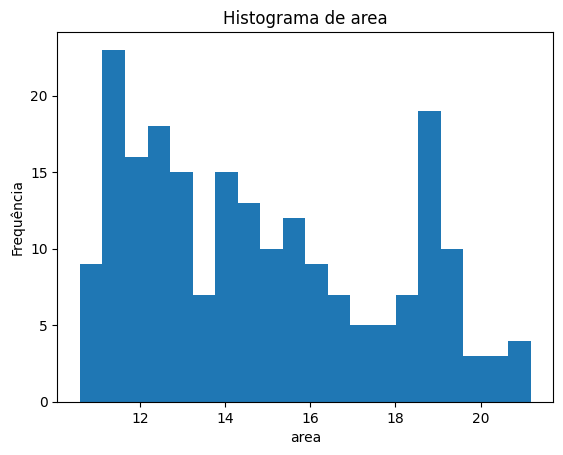

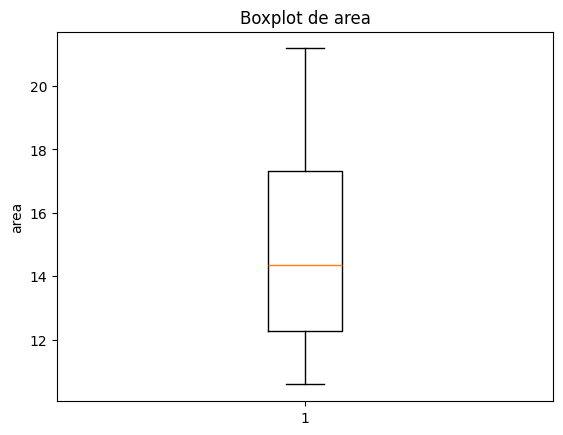

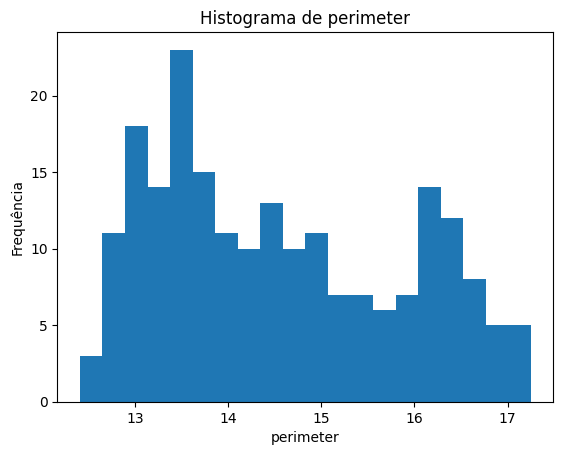

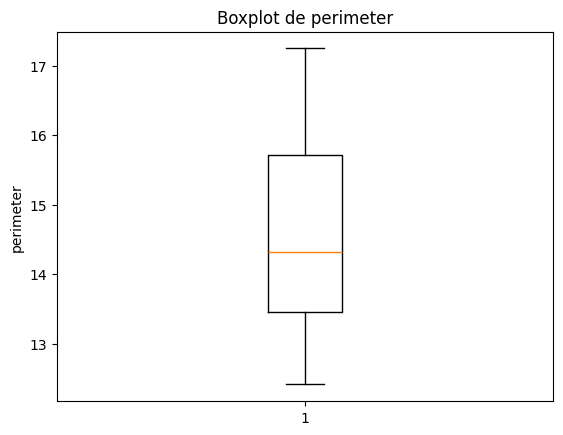

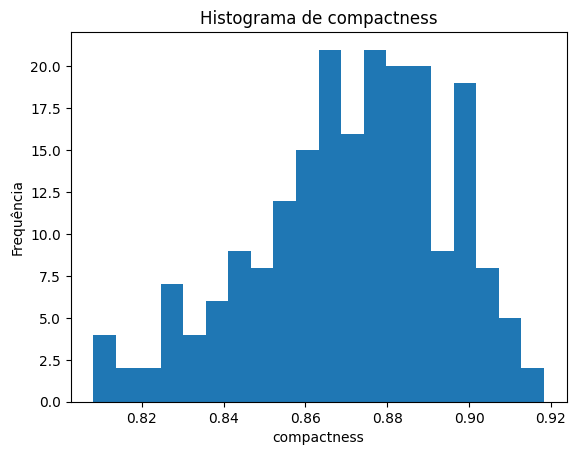

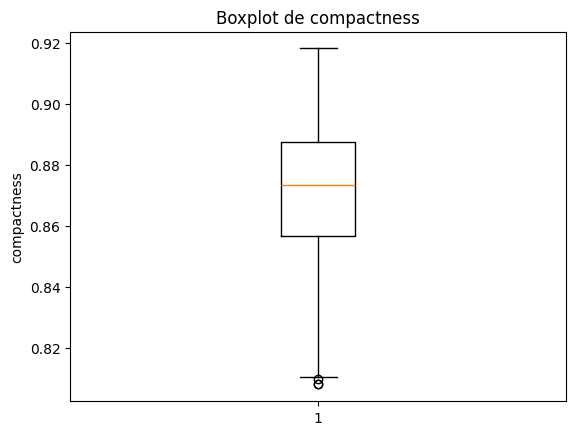

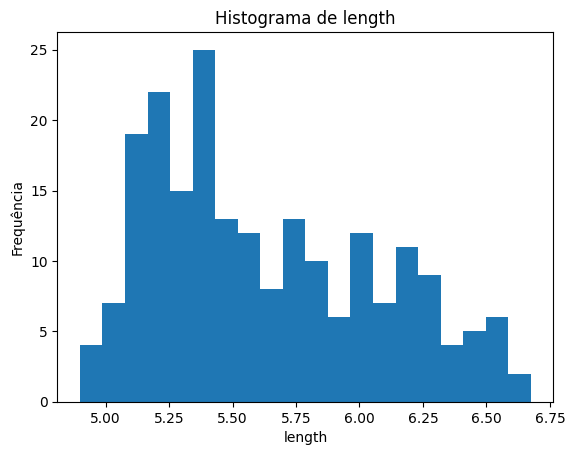

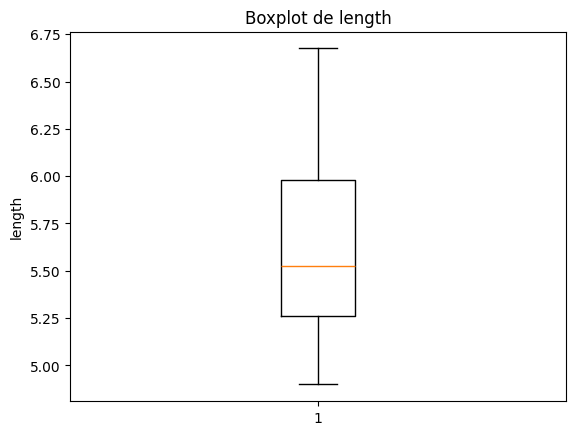

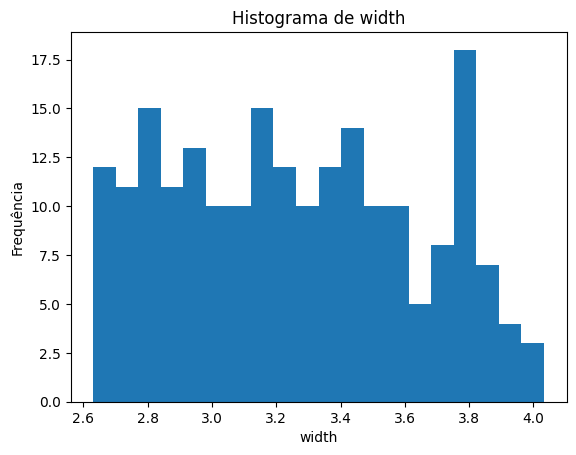

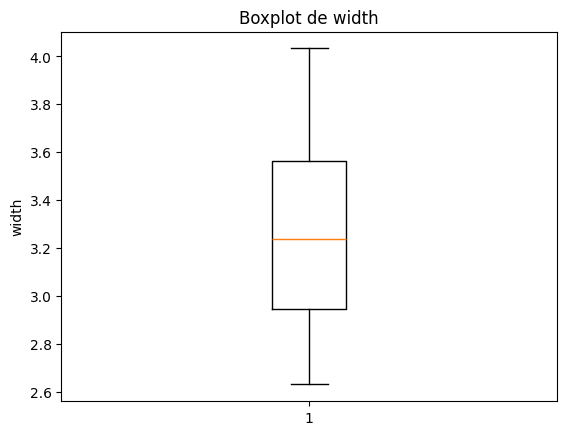

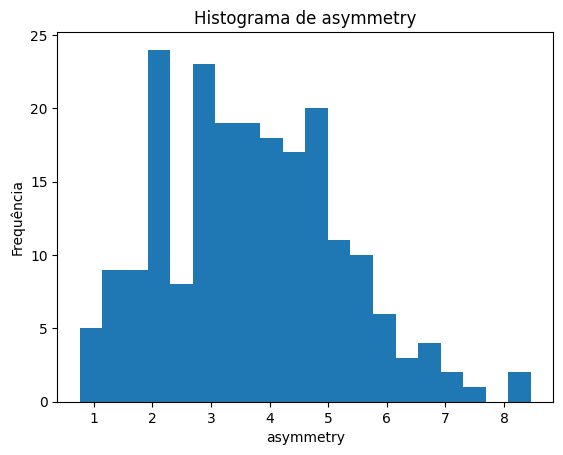

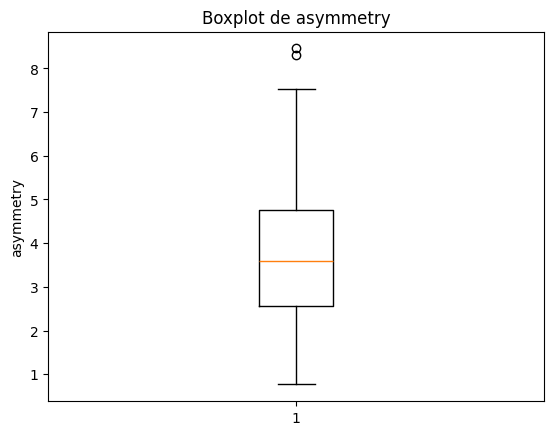

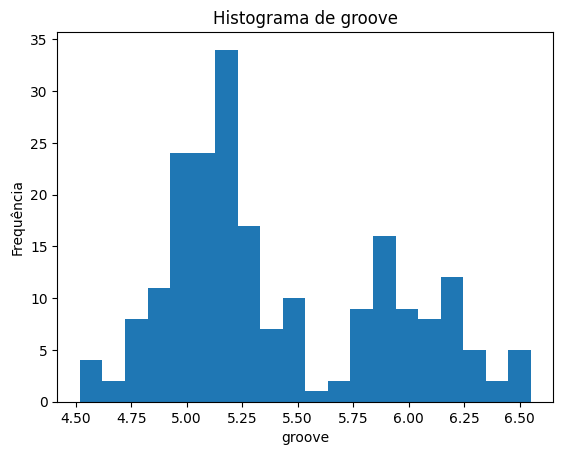

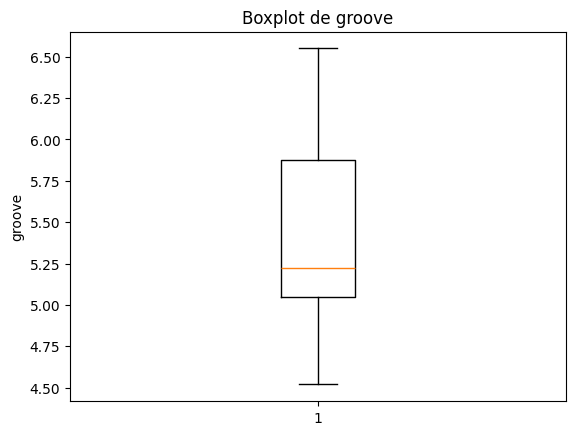

In [3]:
features = ['area','perimeter','compactness','length','width','asymmetry','groove'] if 'compactness' in df.columns else ['area','perimeter','length','width','asymmetry','groove']
for col in features:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col); plt.ylabel('Frequência')
    plt.show()
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()

## Scatter Matrix (Matriz de Dispersão)

<Figure size 1000x1000 with 0 Axes>

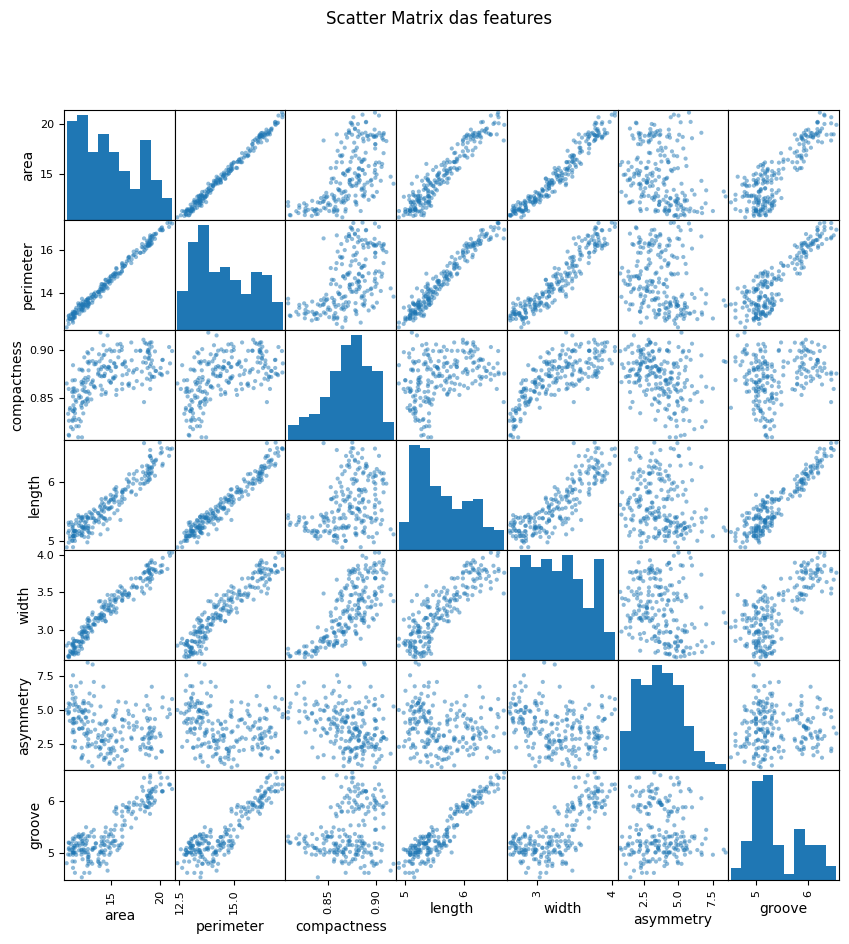

In [4]:
plt.figure(figsize=(10,10))
scatter_matrix(df[features], figsize=(10,10), diagonal='hist')
plt.suptitle('Scatter Matrix das features')
plt.show()

## Análise de Correlações
- Verificar correlação (Pearson) entre atributos

,area,perimeter,compactness,length,width,asymmetry,groove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


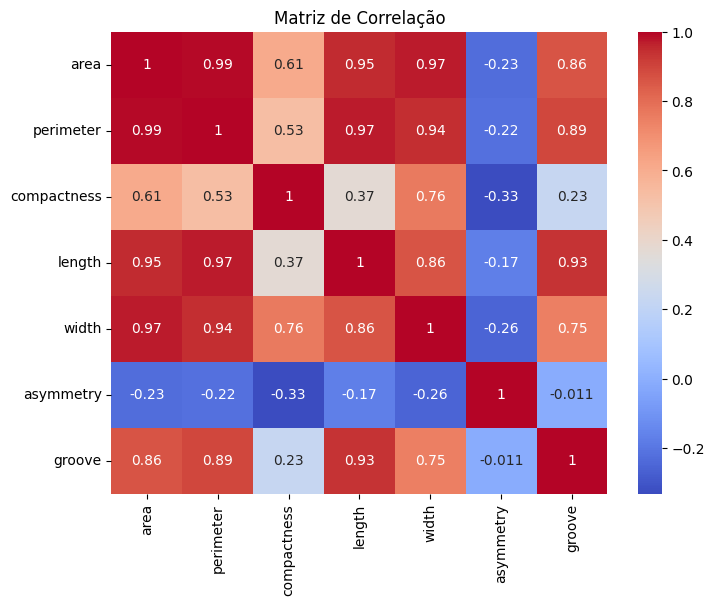

In [ ]:
corr = df[features].corr()
display(corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()